<a href="https://colab.research.google.com/github/rfaran/ML-TeslaStockPricePrediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML Project - TESLA Stock Price prediction/Analysis**
###Group members:
1. Faran Rasheed (SP21-MSCS-0048)
2. Shoaib Saleem (SP21-MSCS-0046)


**TESLA** share price stock data downloaded from: 

https://finance.yahoo.com/quote/TSLA

Data includes share price with details from **2010** to **Dec 2021**


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns


## Data

In [2]:
# importing the CSV dataset
tesla_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')

Let’s explore the data a little bit 

In [3]:
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [4]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2896 non-null   object 
 1   Open       2896 non-null   float64
 2   High       2896 non-null   float64
 3   Low        2896 non-null   float64
 4   Close      2896 non-null   float64
 5   Adj Close  2896 non-null   float64
 6   Volume     2896 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 158.5+ KB


In [5]:
tesla_df.shape

(2896, 7)

Statistical details of the dataset

In [6]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2.896000e+03
mean,123.016652,125.635108,120.250410,123.119965,123.119965,3.135647e+07
std,225.678550,230.622075,220.409776,225.922321,225.922321,2.820294e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,17.593501,18.423000,16.944500,17.549499,17.549499,1.283100e+07
50%,46.152000,46.959001,45.439001,46.122002,46.122002,2.482425e+07
75%,66.661503,67.966499,65.457498,66.779001,66.779001,3.997955e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [7]:
# Drop this unused column
tesla_df.drop(columns=['Adj Close'],inplace=True)

In [8]:
# print the columns
tesla_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

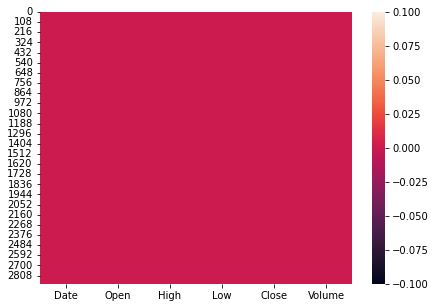

In [9]:
# Exploring missing data and checking if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(tesla_df.isnull())
tesla_df.isnull().any()


In [10]:
tesla_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

The data is already claen and there is no any missing value to deal with

# Exploratory Data Analysis

let’s plot our data points to see our dataset and check if we can manually find any relationship between the data.

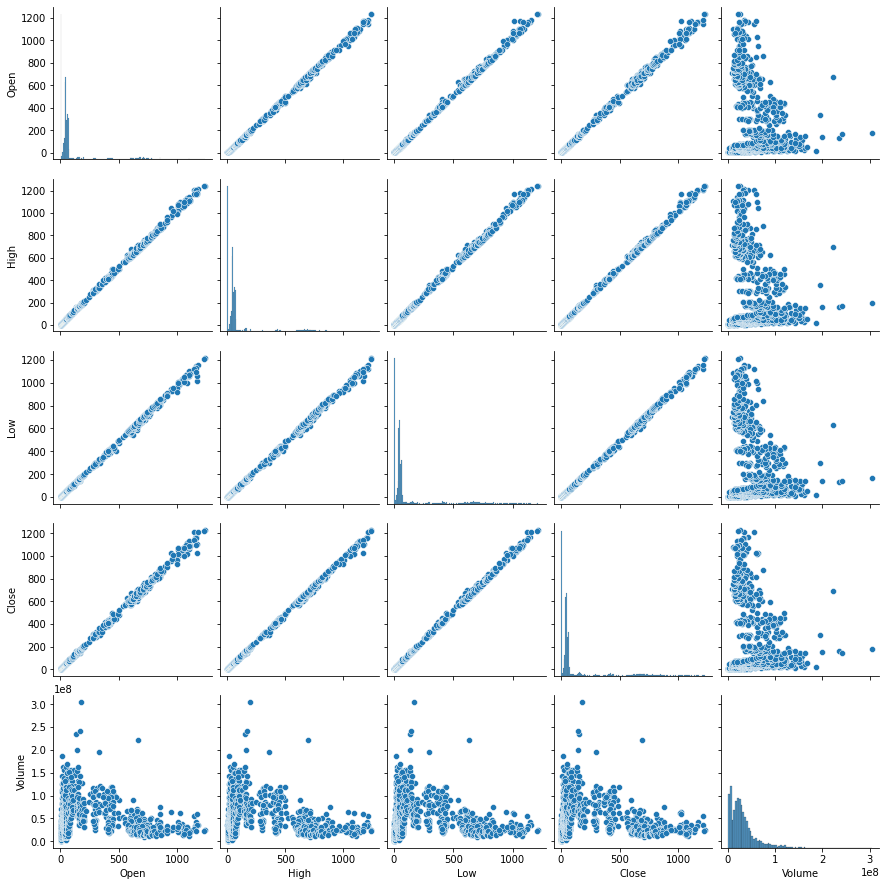

In [11]:
sns.pairplot(tesla_df)


In [12]:
fig = px.line(tesla_df, x='Date', y='Volume', title="TESLA stock Volume")
fig.show()

In [13]:
fig = px.line(tesla_df, x='Date', y='Close', title="TESLA stock closing prices")
fig.show()

In [14]:
corr = tesla_df.corr(method='pearson')
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999748,0.999636,0.999346,0.111860
High,0.999748,1.000000,0.999591,0.999709,0.116225
Low,0.999636,0.999591,1.000000,0.999696,0.107457
Close,0.999346,0.999709,0.999696,1.000000,0.112596
Volume,0.111860,0.116225,0.107457,0.112596,1.000000


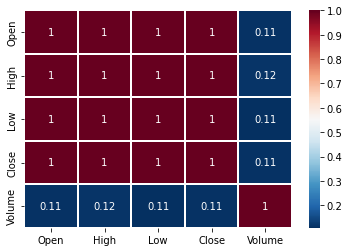

In [15]:
# correlation plot
sns.heatmap(corr, annot=True, linewidth=1, cmap='RdBu_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



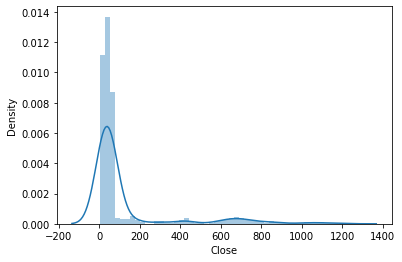

In [16]:
# distribution histogram
sns.distplot(tesla_df["Close"])

# Data preparation

Our next step is to divide the data into “attributes” and “labels”.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 

In our dataset, We want to predict the 'Close' value depending upon the 'High', 'Low', 'Open' and 'Volume'. 

Attribute set is stored in the X variable, and the label is stored in y variable.


In [17]:
#instead of using date as string, lets format it accordingly and make separate colums for day, month and year
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'], errors='coerce')
tesla_df['Year']=tesla_df['Date'].dt.year
tesla_df['Month']=tesla_df['Date'].dt.month
tesla_df['Day']=tesla_df['Date'].dt.day

tesla_df = tesla_df[['Day','Month','Year','High','Open','Low','Close']]
tesla_df.head(10)

,Day,Month,Year,High,Open,Low,Close
0,1,7,2010,5.184,5.000,4.054,4.392
1,2,7,2010,4.620,4.600,3.742,3.840
2,6,7,2010,4.000,4.000,3.166,3.222
3,7,7,2010,3.326,3.280,2.996,3.160
4,8,7,2010,3.504,3.228,3.114,3.492
5,9,7,2010,3.580,3.516,3.310,3.480
6,12,7,2010,3.614,3.590,3.400,3.410
7,13,7,2010,3.728,3.478,3.380,3.628
8,14,7,2010,4.030,3.588,3.552,3.968
9,15,7,2010,4.300,3.988,3.800,3.978


In [18]:
#separate Independent and dependent variable
X = tesla_df.iloc[:,tesla_df.columns !='Close']
Y = tesla_df.iloc[:, 6]

In [19]:
X.head()

,Day,Month,Year,High,Open,Low
0,1,7,2010,5.184,5.000,4.054
1,2,7,2010,4.620,4.600,3.742
2,6,7,2010,4.000,4.000,3.166
3,7,7,2010,3.326,3.280,2.996
4,8,7,2010,3.504,3.228,3.114


In [20]:
Y.head()

0    4.392
1    3.840
2    3.222
3    3.160
4    3.492
Name: Close, dtype: float64

Then, using the code below, we split 80 percent of the data into the training set and 20 percent into the test set.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [22]:
x_train.shape

(2316, 6)

In [23]:
x_test.shape

(580, 6)

In [24]:
y_train.shape

(2316,)

In [25]:
y_test.shape

(580,)

# Linear Regression

In [26]:
# training out algorightm
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [27]:
# time to make some predictions
y_pred = linear_reg_model.predict(x_test)


In [28]:
print(linear_reg_model.coef_)
# This means for every one unit of change in any attribute accounts to X percentage of closed amount.

[-0.0047919   0.03475966 -0.0181818   0.90799903 -0.6114689   0.70130699]


In [29]:
# Coefficient dataframe
pd.DataFrame(linear_reg_model.coef_, X.columns, columns = ['Coefficient'])

,Coefficient
Day,-0.004792
Month,0.034760
Year,-0.018182
High,0.907999
Open,-0.611469
Low,0.701307


In [30]:
print(linear_reg_model.intercept_)

36.4267339486169


In [31]:
print(y_pred)

[   3.96455451   18.03009185   72.96670346    5.80120246   43.95742493
   60.8695656     5.69060068  606.88142246    7.11738416  164.16493595
    6.59239563   40.12519291    5.70710625   55.28663006   61.70397459
   44.07261682  142.66363009    5.73974213    5.31731641   69.46609403
   71.26964608   47.35352196    4.11815344   25.12246623   40.58122688
  114.24010549   43.42224926   42.4083524   662.87760578  893.67816342
   43.01427365  417.51701424   39.35253837   39.37215943  113.64890573
  755.1582363    44.71285008   38.77153875    4.40896348   63.82580532
   60.91085426  161.7659169     5.93954309   57.81058805   94.19785362
    6.34351415   38.88310051   45.46740932   37.5722882   421.86082783
   50.80185893   62.28535029    5.75248221    4.42815158   51.24415255
   57.18319688  602.31880871  675.79992348    4.03907015   41.14800254
   67.81625937   60.22607832   64.22947892    8.11329134    6.55282167
   44.08314324   44.78841494    6.53838693   38.12917461    6.19551514
   55.

In [32]:
# Comparing the actual output values for x_test with the y_pred values
tesla_df_2 = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})

In [33]:
tesla_df_2.head(10)

,Actual,Predicted
20,3.988000,3.964555
724,18.299999,18.030092
1794,72.582001,72.966703
529,5.654000,5.801202
2258,44.372002,43.957425
1711,61.104000,60.869566
375,5.580000,5.690601
2748,605.119995,606.881422
615,6.914000,7.117384
2490,163.376007,164.164936


Lets visualize comparison result as a bar graph using the below script

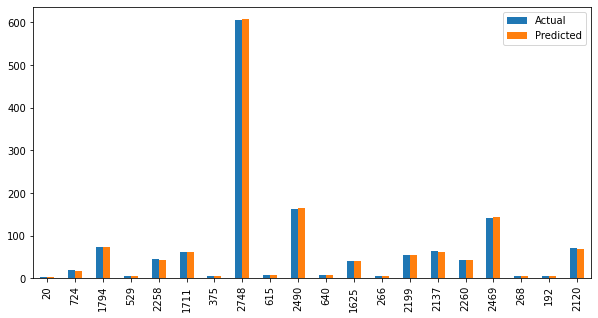

In [34]:
graph = tesla_df_2.head(20)
graph.plot(kind='bar', figsize=(10,5))

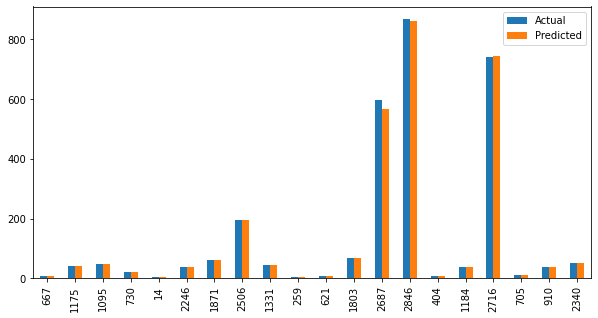

In [35]:
graph = tesla_df_2.tail(20)
graph.plot(kind='bar', figsize=(10,5))

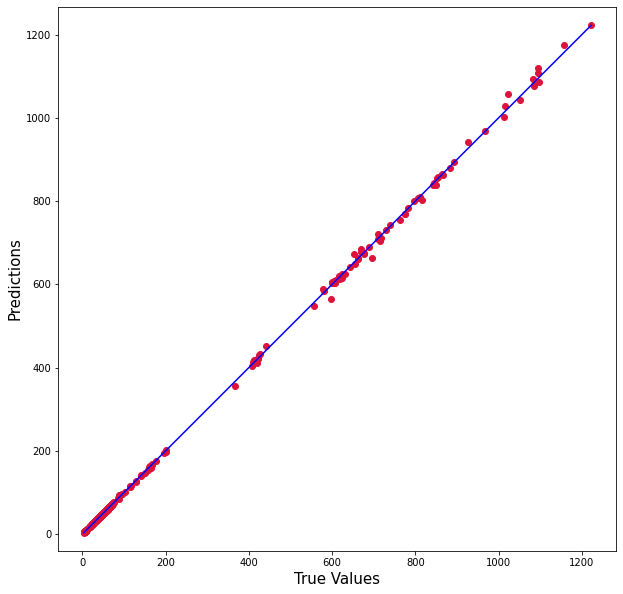

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.axis('equal')

plt.show()


#### Linear Model Cross-Validation

In [37]:
from sklearn import model_selection   
kfold = model_selection.KFold(n_splits=20)
results_kfold = model_selection.cross_val_score(linear_reg_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)


Accuracy:  99.96505751442093


#### Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors

**Mean Squared Error** (MSE) is the mean of the squared errors

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.



In [38]:
import math
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE):', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error (MAE): 1.2480704793526223
Mean Squared Error (MSE): 13.898634172496212
Root Mean Squared Error (RMSE): 3.728087200226976


# K Means

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
# Look at the 5 closest neighbors
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn_regressor.fit(x_train, y_train)

In [41]:
y_knn_pred = knn_model.predict(x_test)

#### KNN Model Cross-Validation

In [42]:
knn_kfold = model_selection.KFold(n_splits=20)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)


Accuracy:  99.81744018313773


In [43]:
# Try different numbers of n_estimators
n_neighbors = np.arange(1, 50, 1)
scores = []
for n in n_neighbors:
    knn_model.set_params(n_neighbors=n)
    knn_model.fit(x_train, y_train)
    scores.append(knn_model.score(x_test, y_test))

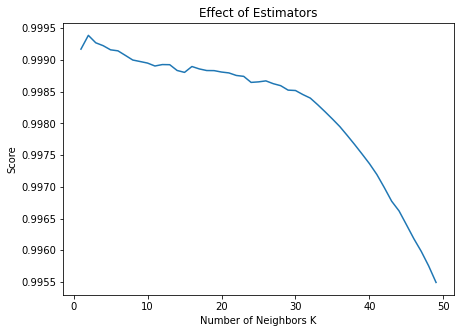

In [44]:
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model = RandomForestRegressor(n_jobs=-1)

In [47]:
# Trying different numbers of n_estimators
scores = []
estimators = np.arange(10, 200, 10)
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

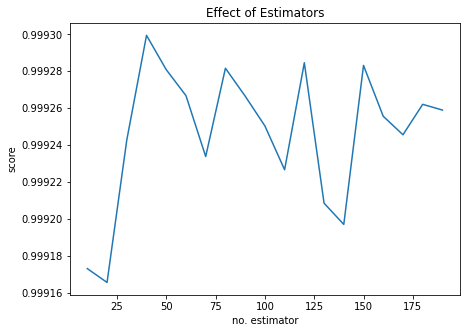

In [48]:
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
